In [1]:
import os
import sys
AbsPath = os.path.abspath("")
STEEL_Path = AbsPath+"/../.."
sys.path.append(AbsPath+"/../..")
import numpy as np
from itertools import cycle
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#set plot paramaters here
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams['ytick.minor.visible']=True
plt.rcParams['xtick.minor.visible']=True
plt.rcParams['axes.linewidth']=2
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
mpl.rcParams['axes.titlepad'] = 20

plt.rcParams['font.size']=15

/home/pg1g15/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/pg1g15/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/pg1g15/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [85]:
Data = np.load(STEEL_Path+"/Scripts/CentralPostprocessing/HaloMassTrackCE.npy")

GalaxyMassTrack10 = np.load(STEEL_Path+"/Scripts/CentralPostprocessing/GalaxyTracks9.9.npy")
Mask = np.ma.masked_inside(GalaxyMassTrack10[0], 0, 5).mask
GalaxyMass10 = np.log10(GalaxyMassTrack10[1][Mask])
Galaxy10SFR = np.log10(GalaxyMassTrack10[2] + GalaxyMassTrack10[3])[Mask]

GalaxyMassTrack11 = np.load(STEEL_Path+"/Scripts/CentralPostprocessing/GalaxyTracks11.0.npy")
Mask = np.ma.masked_inside(GalaxyMassTrack11[0], 0, 5).mask
GalaxyMass11 = np.log10(GalaxyMassTrack11[1][Mask])
Galaxy11SFR = np.log10(GalaxyMassTrack11[2] + GalaxyMassTrack11[3])[Mask]

GalaxyMassTrack11p5 = np.load(STEEL_Path+"/Scripts/CentralPostprocessing/GalaxyTracks11.5.npy")
Mask = np.ma.masked_inside(GalaxyMassTrack11p5[0], 0, 5).mask
GalaxyMass11p5 = np.log10(GalaxyMassTrack11p5[1][Mask])
Galaxy11p5SFR = np.log10(GalaxyMassTrack11p5[2] + GalaxyMassTrack11p5[3])[Mask]

GalaxyMassTrack12 = np.load(STEEL_Path+"/Scripts/CentralPostprocessing/GalaxyTracks12.0.npy")
Mask = np.ma.masked_inside(GalaxyMassTrack12[0], 0, 5).mask
GalaxyMass12 = np.log10(GalaxyMassTrack12[1][Mask])
Galaxy12SFR = np.log10(GalaxyMassTrack12[2] + GalaxyMassTrack12[3])[Mask]


def G19_SFR_DPL(M_out, z = 0.5):
    M_n = np.power(10, 10.7 + 0.35*z - 0.08*(z**2))
    Norm = 0.75 + 0.71*z - 0.086*(z**2)
    Alpha = 1.03 - 0.019*z + 0.007*(z**2)#
    Beta = 1.5 - 0.23*z - 0.045*(z**2)
    MperY = 2*(10**Norm)*np.power( np.power(np.divide(10**M_out, M_n), -Alpha) + np.power(np.divide(10**M_out, M_n), Beta), -1)
    return np.log10(MperY)

def G19_SFR_DPL(M_out, z = 0.5):
    M_n = np.power(10, 10.7 + 0.35*z - 0.08*(z**2))
    Norm = 0.74 + 0.71*z - 0.086*(z**2)
    Alpha = 1.03 - 0.022*z + 0.0079*(z**2)#
    Beta = 1.55 - 0.225*z - 0.045*(z**2)
    MperY = 2*(10**Norm)*np.power( np.power(np.divide(10**M_out, M_n), -Alpha) + np.power(np.divide(10**M_out, M_n), Beta), -1)
    return np.log10(MperY)

In [25]:
def G19_SFR_DPL(M_out, z = 0.5):
    M_n = np.power(10, 10.7 + 0.34*z - 0.079*(z**2))
    Norm = 0.74 + 0.71*z - 0.087*(z**2)
    Alpha = 1.035 - 0.022*z + 0.0077*(z**2)#
    Beta = 1.55 - 0.35*z - 0.02*(z**2)
    MperY = 2*(10**Norm)*np.power( np.power(np.divide(10**M_out, M_n), -Alpha) + np.power(np.divide(10**M_out, M_n), Beta), -1)
    return np.log10(MperY)

In [64]:
def S15(SM, z):
    m = SM-9; r = np.log10(1+z)
    m0, a0, a1, m1, a2 = 0.5, 1.5, 0.3, 0.36, 2.5
    Max = m-m1-a2*r
    Max[Max<0] = 0
    log10MperY = m-m0+a0*r-a1*np.power(Max, 2)
    return log10MperY

In [70]:
def T16(SM, z):   
    #Tomczak 2016 All Galaxies
    s0 = 0.195 + 1.157*(z) - 0.143*(z**2)
    logM0 = 9.244 + 0.753*(z) - 0.09*(z**2)
    Gamma = -1.118 #including -ve here to avoid it later
    log10MperY = s0 - np.log10(1 + np.power(np.power(10, (SM - logM0) ), Gamma))
    return log10MperY

/home/pg1g15/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.


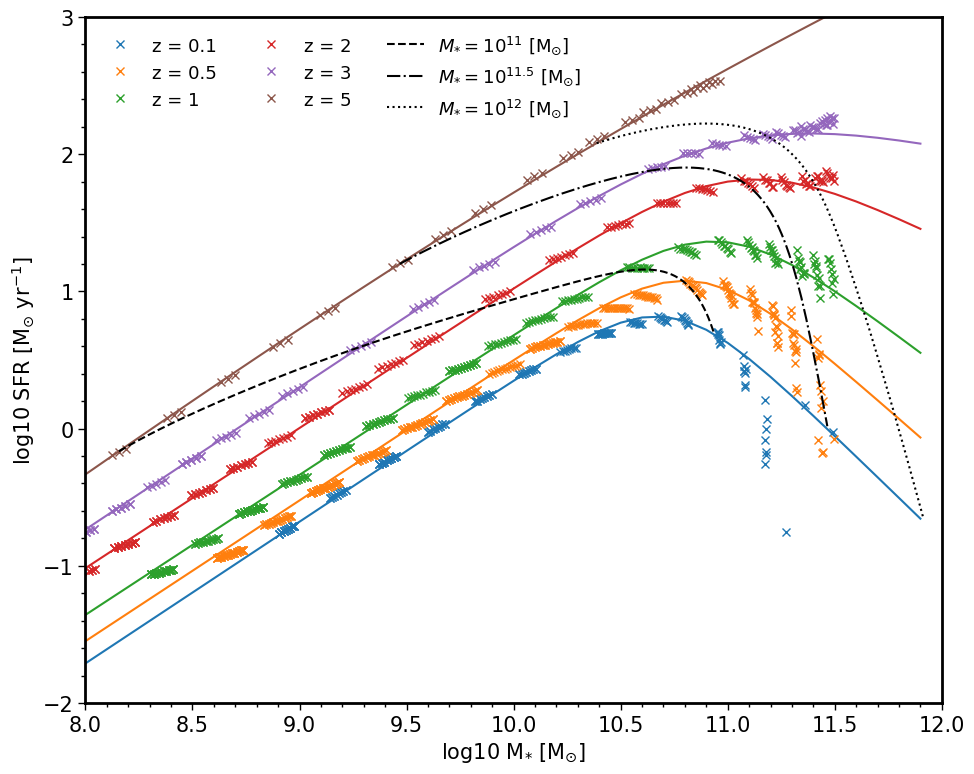

In [91]:
colours = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "k"]
colourcycler = cycle(colours)
M = np.arange(7, 12, 0.1)
plt.figure(figsize = [10,8])
for Redshift in [0.1,0.5, 1, 2, 3,5]:#[0.1,0.75, 1.25, 1.75, 2.25]:#
    colour = next(colourcycler)
    Mask0 = np.ma.masked_inside(np.log10(Data[0]), 8, 11.5).mask
    Mask1 = np.ma.masked_inside(Data[2], Redshift-0.1, Redshift+0.1).mask
    Mask = Mask0 * Mask1
    plt.plot(np.log10(Data[0][Mask]), np.log10(Data[1][Mask]), "x", label = "z = {}".format(Redshift), color = colour)
    plt.plot(M, G19_SFR_DPL(M, Redshift), "-", color = colour)
    #plt.plot(M, S15(M, Redshift), "--", color = colour)
    #plt.plot(M, T16(M, Redshift), "-.", color = colour)
plt.plot(GalaxyMass11, Galaxy11SFR, "--", color = "k", label = r"$M_{*} = 10^{11}$ [M$_{\odot}$]")
plt.plot(GalaxyMass11p5, Galaxy11p5SFR, "-.", color = "k", label = r"$M_{*} = 10^{11.5}$ [M$_{\odot}$]")
plt.plot(GalaxyMass12, Galaxy12SFR, ":", color = "k", label = r"$M_{*} = 10^{12}$ [M$_{\odot}$]")

plt.ylabel("log10 SFR [M$_{\odot}$ yr$^{-1}$]")
plt.xlabel("log10 M$_{*}$ [M$_{\odot}$]")
plt.xlim(8, 12)
plt.ylim(-2, 3)
plt.tight_layout()
plt.legend(frameon = False, ncol = 3, loc = 2, fontsize = 13)
plt.savefig(STEEL_Path+"/Figures/Paper2/HMC_DPL.png")
plt.savefig(STEEL_Path+"/Figures/Paper2/HMC_DPL.pdf")
plt.show()

/home/pg1g15/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.


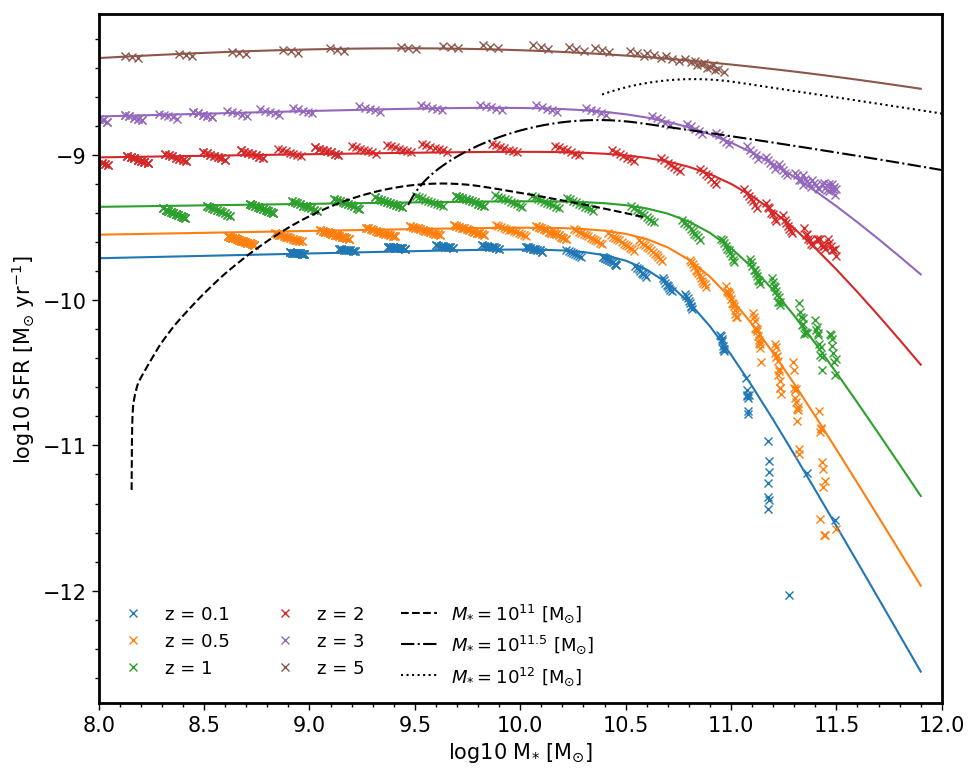

In [79]:
colours = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "k"]
colourcycler = cycle(colours)
M = np.arange(7, 12, 0.1)
plt.figure(figsize = [10,8])
for Redshift in [0.1,0.5, 1, 2, 3,5]:
    colour = next(colourcycler)
    Mask0 = np.ma.masked_inside(np.log10(Data[0]), 8, 11.5).mask
    Mask1 = np.ma.masked_inside(Data[2], Redshift-0.1, Redshift+0.1).mask
    Mask = Mask0 * Mask1
    plt.plot(np.log10(Data[0][Mask]), np.log10(Data[1][Mask])-np.log10(Data[0][Mask]), "x", label = "z = {}".format(Redshift), color = colour)
    plt.plot(M, G19_SFR_DPL(M, Redshift)-M, "-", color = colour)
    #plt.plot(M, S15(M, Redshift)-M, "--", color = colour)
    #plt.plot(M, T16(M, Redshift)-M, "-.", color = colour)
plt.plot(GalaxyMass11, Galaxy11SFR - GalaxyMass11, "--", color = "k", label = r"$M_{*} = 10^{11}$ [M$_{\odot}$]")
plt.plot(GalaxyMass11p5, Galaxy11p5SFR - GalaxyMass11p5, "-.", color = "k", label = r"$M_{*} = 10^{11.5}$ [M$_{\odot}$]")
plt.plot(GalaxyMass12, Galaxy12SFR - GalaxyMass12, ":", color = "k", label = r"$M_{*} = 10^{12}$ [M$_{\odot}$]")

plt.ylabel("log10 SFR [M$_{\odot}$ yr$^{-1}$]")
plt.xlabel("log10 M$_{*}$ [M$_{\odot}$]")
plt.xlim(8, 12)
#plt.ylim(-2, 3)
plt.tight_layout()
plt.legend(frameon = False, ncol = 3, loc = 3, fontsize = 13)
plt.savefig(STEEL_Path+"/Figures/Paper2/HMC_DPL_sSFR.png")
plt.savefig(STEEL_Path+"/Figures/Paper2/HMC_DPL_sSFR.pdf")
plt.show()

/home/pg1g15/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log10
  if sys.path[0] == '':
/home/pg1g15/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


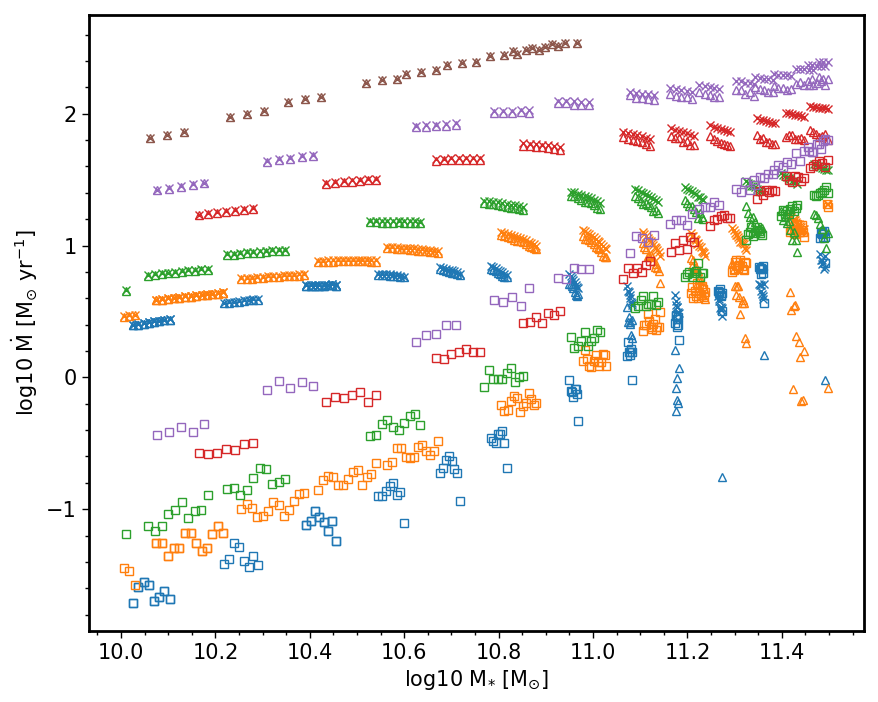

In [59]:
colours = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "k"]
colourcycler = cycle(colours)
M = np.arange(7, 12, 0.1)
plt.figure(figsize = [10,8])
for Redshift in [0.1,0.5, 1, 2, 3,5]:
    colour = next(colourcycler)
    Mask0 = np.ma.masked_inside(np.log10(Data[0]), 10, 11.5).mask
    Mask1 = np.ma.masked_inside(Data[2], Redshift-0.1, Redshift+0.1).mask
    Mask = Mask0 * Mask1
    plt.plot(np.log10(Data[0][Mask]), np.log10(Data[3][Mask]+Data[1][Mask]), "x", label = "z = {}".format(Redshift), color = colour)
    plt.plot(np.log10(Data[0][Mask]), np.log10(Data[3][Mask]), "s", label = "z = {}".format(Redshift), color = colour, fillstyle = 'none')
    plt.plot(np.log10(Data[0][Mask]), np.log10(Data[1][Mask]), "^", label = "z = {}".format(Redshift), color = colour, fillstyle = 'none')
    
plt.ylabel("log10 $\mathrm{\dot{M}} $ [M$_{\odot}$ yr$^{-1}$]")
plt.xlabel("log10 M$_{*}$ [M$_{\odot}$]")
#plt.legend(frameon = False)
plt.show()